# Modeling Gloabl COVID - 19 Trends With the SIR Epidemic Model

In this notebook, we will model the spread of COVID in 10 countries with the highest number of COVID cases by using global confirmed, death, and recovered case data and the SIR epidemic model.

In [1]:
# Import libraries
import pandas as pd
from pandas import read_csv
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math

import src.processing.processing as process # Python file used to process raw data
import src.processing.df_format as df_format

import src.modeling.sir as sir # Python file used to process raw data

import importlib 
importlib.reload(df_format)
importlib.reload(process)
importlib.reload(sir)
import pprint

### Background Information

The SIR Epidemic Model is a simple epidemic model that divides a fixed population into three categories: susceptible, infected, and recovered.

 - Susceptible / S(t): number of individuals in a population that can catch the disease
 
 - Infected / I(t): number of individuals in a population that have the disease
 
 - Recovered / R(t): number of individuals in a population that have immunity to the disease 
     - this includes individuals that have died from the disease

The SIR model integrates the following three differential equations to calculate the number of individuals in each category over a period of time

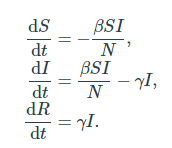

The variables $\beta$ and $\gamma$ are used to modify the rate at which individuals move between categories. Specifically, $\gamma$ controls the rate that infected people recover, and $\beta$ controls the rate that suceptible people get infected.


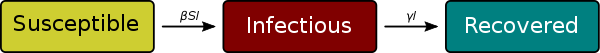

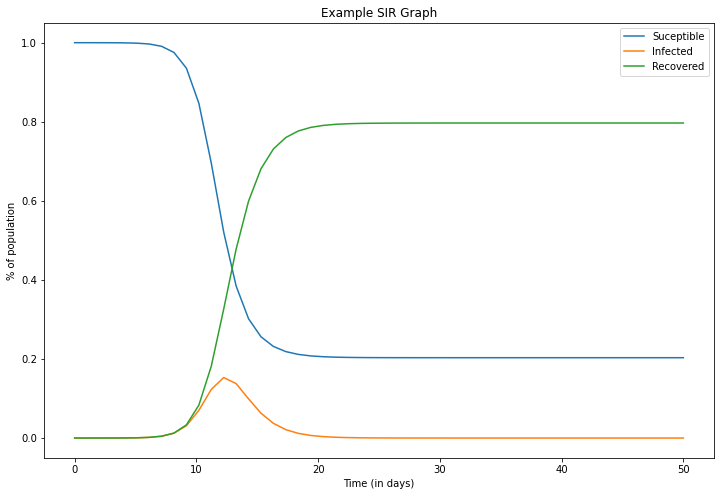

In [2]:
fig, ax = sir.graph_model(2, 1, np.linspace(0, 50,50))

### Data

Lets now look at the data that will be used to train our SIR model. For this particular project, the data for each of the three categories for the SIR model will be percent of population rather than number of individuals for better comparisons between countries.

In [3]:
# Read data for SIR Model
paths = ['data/processed/SIR/s_countries.csv',
         'data/processed/SIR/i_countries.csv',
         'data/processed/SIR/r_countries.csv']

raw_s_countries, raw_i_countries, raw_r_countries = df_format.sir_format(paths[0], paths[1], paths[2])

# Stop at 6 / 1 / 20
s_countries = raw_s_countries.iloc[:, :131]
i_countries = raw_i_countries.iloc[:, :131]
r_countries = raw_r_countries.iloc[:, :131]


This DataFrame contains the % of individuals suceptible to COVID - 19 over a given time period.

In [4]:
s_countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
Afghanistan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999732,0.999711,0.999695,0.999679,0.999661,0.999645,0.999628,0.999610,0.999587,0.999569
Albania,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999378,0.999373,0.999368,0.999364,0.999352,0.999342,0.999329,0.999311,0.999301,0.999290
Algeria,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999709,0.999701,0.999688,0.999684,0.999675,0.999667,0.999660,0.999654,0.999647,0.999640
Andorra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.981039,0.981026,0.981026,0.980884,0.980716,0.980716,0.980651,0.980599,0.980496,0.980470
Angola,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999998,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999831,0.999831,0.999829,0.999829,0.999826,0.999824,0.999821,0.999821,0.999821,0.999820
Western Sahara,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999980,0.999980,0.999975,0.999975,0.999973,0.999973,0.999973,0.999973,0.999973,0.999973
Yemen,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999992,0.999991,0.999991,0.999990,0.999990,0.999989,0.999988,0.999988,0.999987,0.999986
Zambia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999931,0.999931,0.999931,0.999931,0.999931,0.999900,0.999900,0.999900,0.999900,0.999900


This DataFrame contains the % of individuals infected with COVID - 19 over a given time period.

In [5]:
i_countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000206,0.000225,0.000239,0.000253,0.000269,0.000285,0.000298,0.000312,0.000333,0.000350
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000060,0.000061,0.000062,0.000062,0.000067,0.000071,0.000076,0.000075,0.000081,0.000081
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000070,0.000071,0.000067,0.000072,0.000072,0.000071,0.000070,0.000070,0.000070,0.000068
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000764,0.000751,0.000751,0.000634,0.000466,0.000466,0.000401,0.000375,0.000272,0.000246
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,0.000002,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000016,0.000016,0.000014,0.000014,0.000013,0.000014,0.000016,0.000016,0.000017,0.000016
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000005,0.000005,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000005,0.000006,0.000006,0.000006,0.000006,0.000007,0.000007,0.000007,0.000008
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000031,0.000031,0.000031,0.000031,0.000031,0.000015,0.000015,0.000015,0.000015,0.000015


This DataFrame contains the % of individuals that have recovered from COVID - 19 over a given time period.

In [6]:
r_countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.085156e-05,3.226441e-05,3.321488e-05,3.380570e-05,3.462773e-05,3.506443e-05,3.709380e-05,3.866078e-05,3.986813e-05,4.071584e-05
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.807700e-04,2.828550e-04,2.852874e-04,2.873723e-04,2.904997e-04,2.936271e-04,2.974494e-04,3.071791e-04,3.092640e-04,3.144763e-04
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.103280e-04,1.144329e-04,1.227793e-04,1.221408e-04,1.262228e-04,1.311713e-04,1.347060e-04,1.381951e-04,1.412737e-04,1.459714e-04
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.098557e-03,9.111499e-03,9.111499e-03,9.240924e-03,9.409176e-03,9.409176e-03,9.473889e-03,9.512716e-03,9.616256e-03,9.642141e-03
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.085267e-07,6.693793e-07,6.693793e-07,6.693793e-07,6.693793e-07,6.693793e-07,6.693793e-07,6.693793e-07,6.693793e-07,6.693793e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.616546e-05,7.682206e-05,7.879186e-05,7.879186e-05,8.054279e-05,8.054279e-05,8.119939e-05,8.119939e-05,8.119939e-05,8.207485e-05
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004470e-05,1.004470e-05,1.004470e-05,1.004470e-05,1.171882e-05,1.171882e-05,1.171882e-05,1.171882e-05,1.171882e-05,1.171882e-05
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.475225e-06,1.676392e-06,1.743447e-06,1.810503e-06,1.978142e-06,2.112253e-06,2.279892e-06,2.548115e-06,3.017505e-06,3.151616e-06
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.865757e-05,1.865757e-05,1.865757e-05,1.865757e-05,1.865757e-05,4.275467e-05,4.275467e-05,4.275467e-05,4.275467e-05,4.275467e-05


Lets also read COVID case data to help us determine the countries with the highest case numbers.

In [7]:
# Read JHU Data
jhu_paths = ['data/processed/General/covid_confirmed.csv',
             'data/processed/General/covid_deaths.csv',
             'data/processed/General/covid_recovered.csv']

covid_confirmed, covid_deaths, covid_recovered = df_format.jhu_format(jhu_paths[0], jhu_paths[1], jhu_paths[2])

### EDA

First, lets find top 10 countries with the highest number of cases.

In [8]:
top_confirmed_countries = covid_confirmed[covid_confirmed.columns[-1]].sort_values(ascending = False)
countries = [top_confirmed_countries.index[i] for i in range(10)]

countries

['US',
 'Brazil',
 'India',
 'Russia',
 'Peru',
 'South Africa',
 'Colombia',
 'Mexico',
 'Spain',
 'Argentina']

Next, we'll make dictionary containing the date that the % of people infected with COVID in these country first exceeds e^-13. We'll use this dictionary when graphing the data and fitting the model to ensure that only the most relevant parts of the data are used.

In [9]:
countries_name = list(countries)

cutoff = dict({x: None for x in countries_name})

for country in countries_name:
    # Code to find date that country exceeds 1e-13 cases
    for i in i_countries.columns:
        if (i_countries.loc[country,i] > math.exp(-13)):
           cutoff[country] = i
           break
    if cutoff[country] == None: cutoff[country] = '4/1/20'

Lets graph the % of people infected and recovered for each country to get a general idea of what the COVID trends look like.

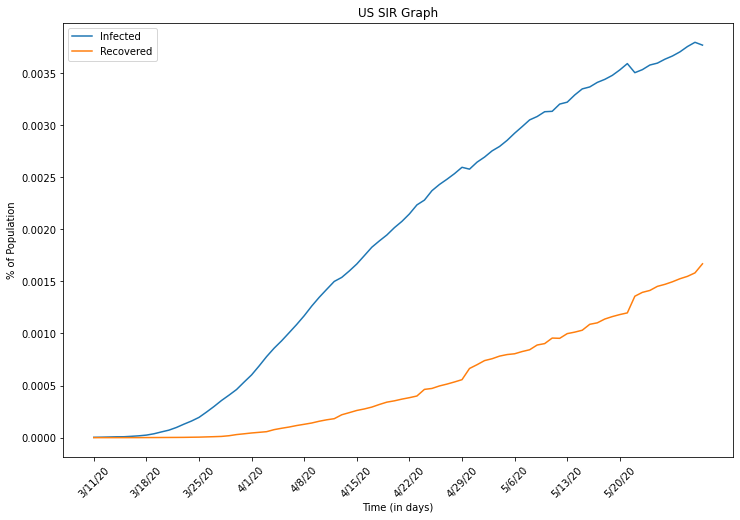

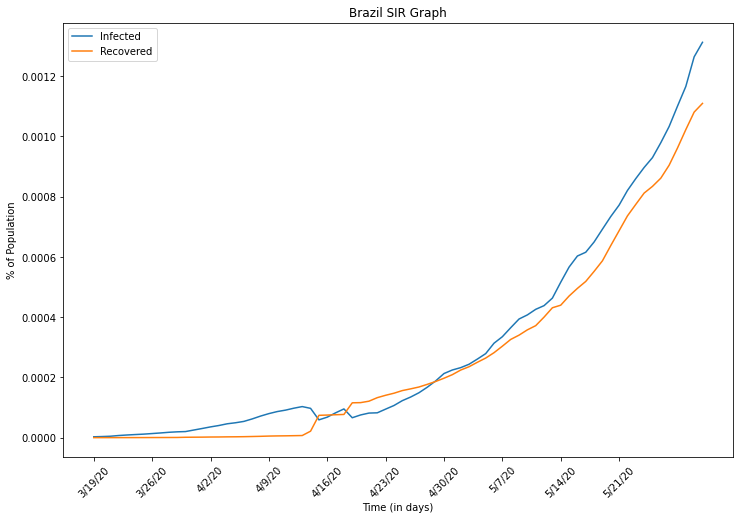

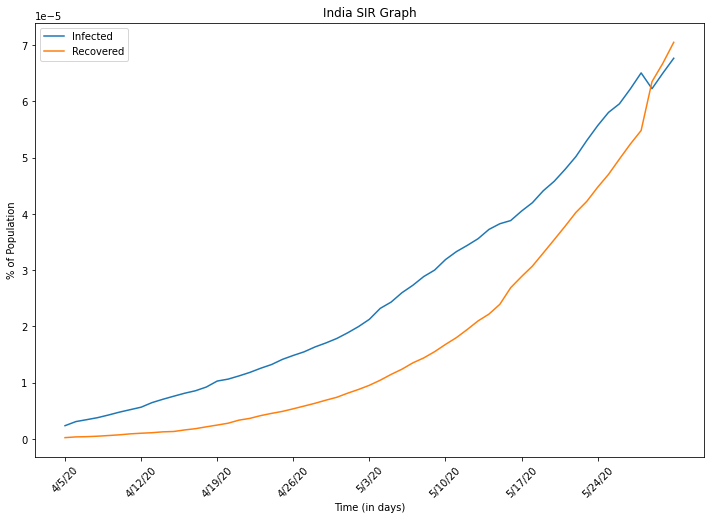

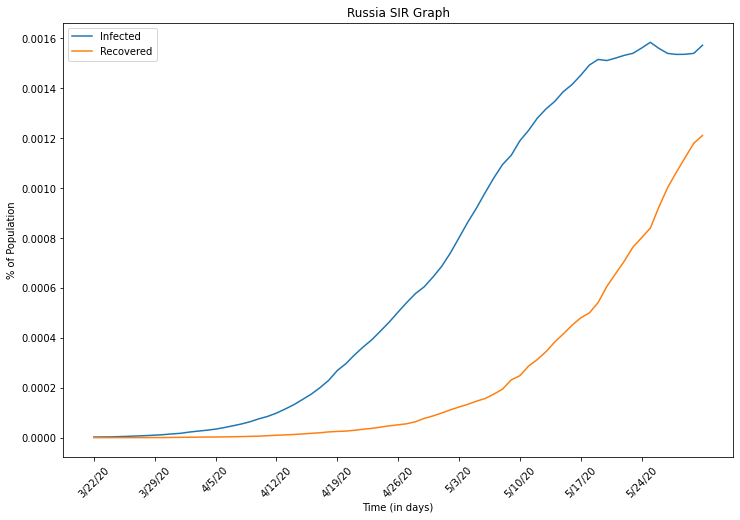

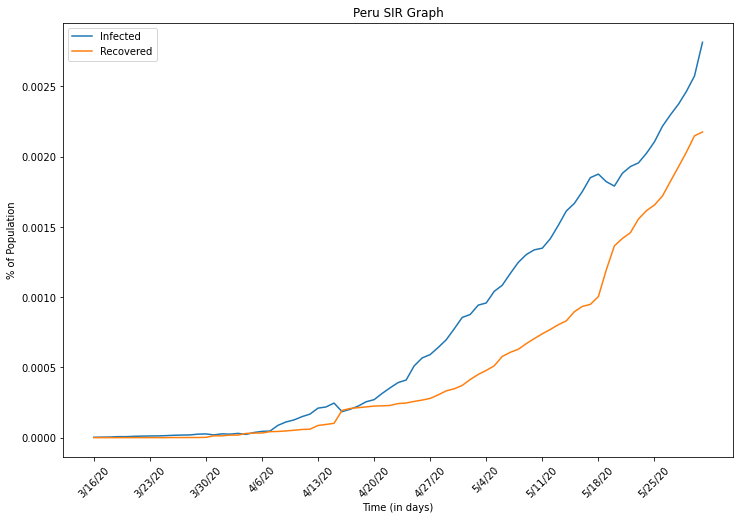

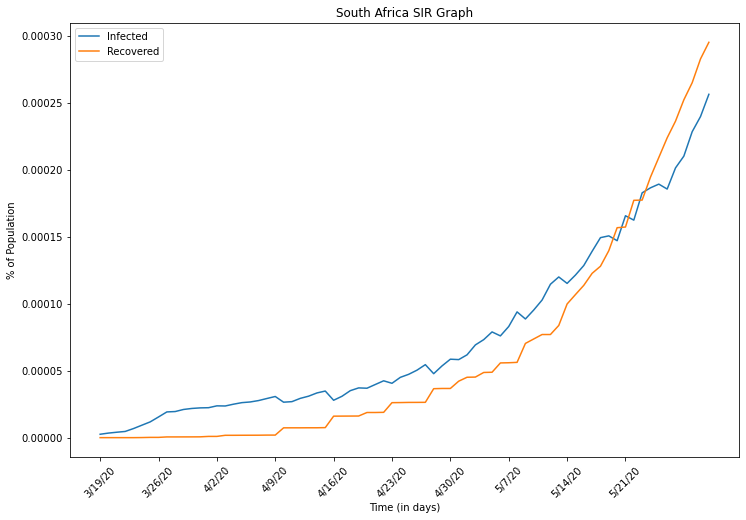

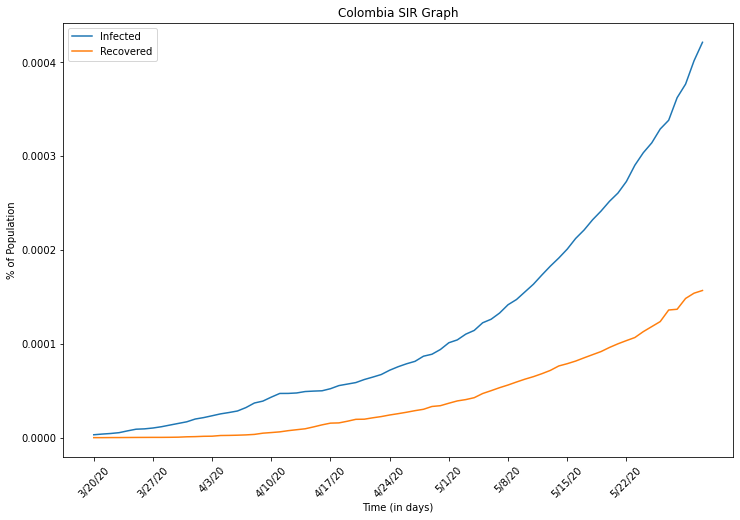

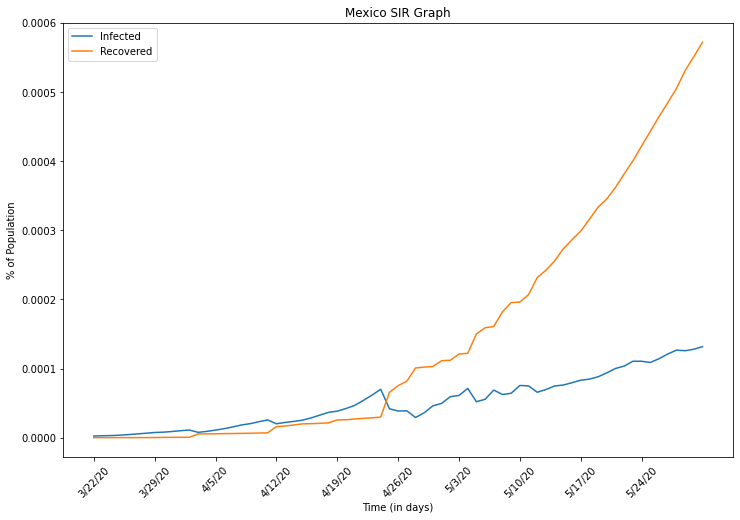

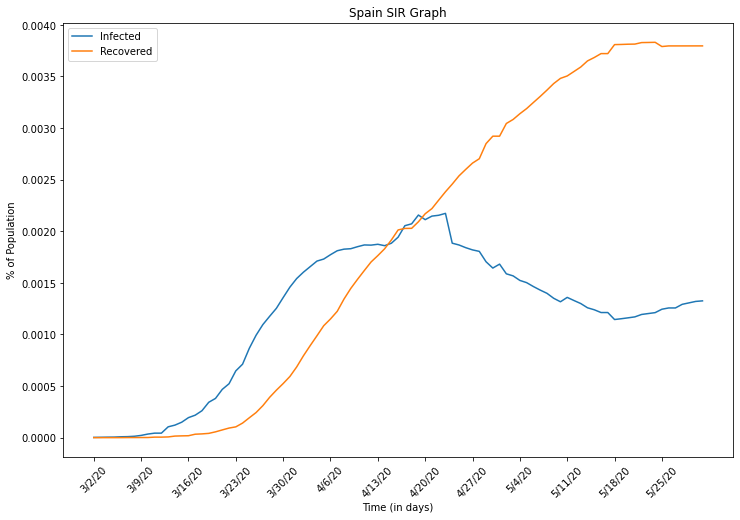

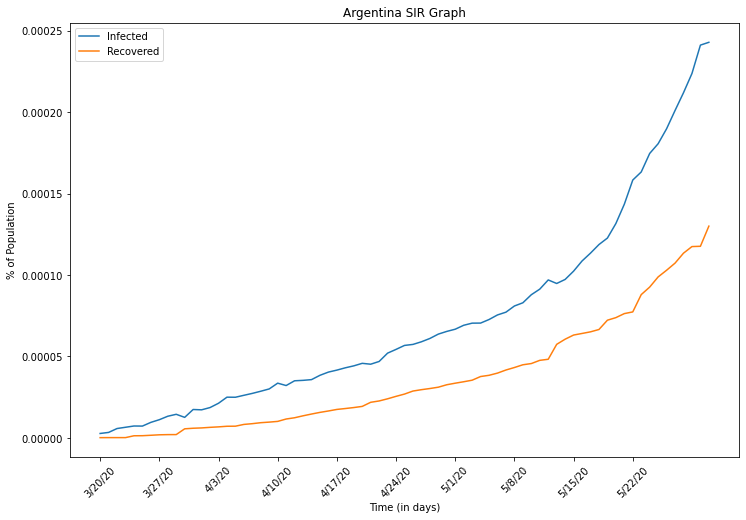

In [10]:
for country in countries:
    index = list(i_countries.columns).index(cutoff[country])
    
    t = s_countries.columns[index:]
    labels = [t[7 *n] for n in range(len(t) // 7)]

    # Set up graph
    fig = plt.figure(figsize = (12, 8))
    ax = plt.subplot(111)
    # ax.plot(t, s_countries.loc[country, :], label = 'Suceptible')
    ax.plot(t, i_countries[i_countries.index == country].iloc[0, index:], label = 'Infected')
    ax.plot(t, r_countries[r_countries.index == country].iloc[0, index:], label = 'Recovered')
    ax.set_title(country + ' SIR Graph')
    ax.set_xlabel('Time (in days)')
    ax.set_ylabel('% of Population')

    ax.set_xticks([x * 7 for x in range(len(labels))])
    ax.set_xticklabels(labels = labels, rotation = 45)
    
    ax.legend()
    plt.show()

We'll also graph the % of people infected and recovered for all 10 countries to see how the trends compare between countries.

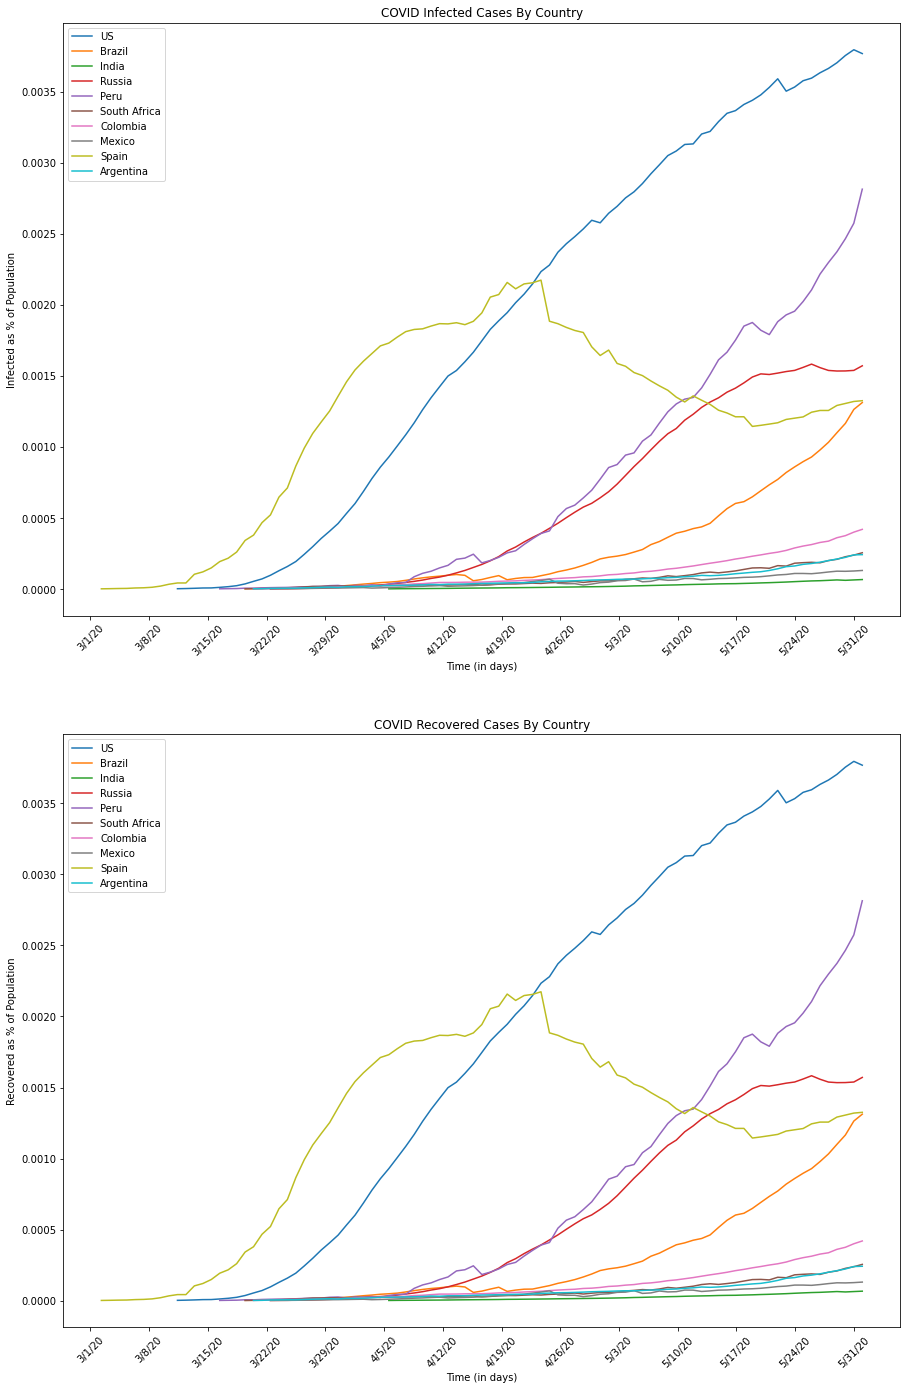

In [11]:
fig = plt.figure(figsize = (15, 24))

ax = plt.subplot(211)
dates = i_countries.columns[39:]
t = np.linspace(0, len(i_countries.columns), len(i_countries.columns))

for country in countries:
    index = list(i_countries.columns).index(cutoff[country])
    ax.plot(t[index:], i_countries[i_countries.index == country].iloc[0, index:], label = country)

ax.set_title('COVID Infected Cases By Country')
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Infected as % of Population')
ticks = [x * 7 + 39 for x in range(len(dates) // 7 + 1)]
labels = [dates[n - 39] for n in ticks]

ax.set_xticks(ticks)
ax.set_xticklabels(labels = labels, rotation = 45)
ax.legend()

ax = plt.subplot(212)

for country in countries:
    index = list(i_countries.columns).index(cutoff[country])
    ax.plot(t[index:], i_countries[i_countries.index == country].iloc[0, index:], label = country)

ax.set_title('COVID Recovered Cases By Country')  
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Recovered as % of Population')

ax.set_xticks(ticks)
ax.set_xticklabels(labels = labels, rotation = 45)
ax.legend()
    
plt.show()

### Fit The Model


Now lets fit the data to the model. For this, we will use the scipy.minimize module. For each country, we'll fit their infected and recovered data to the model, then graph it below.

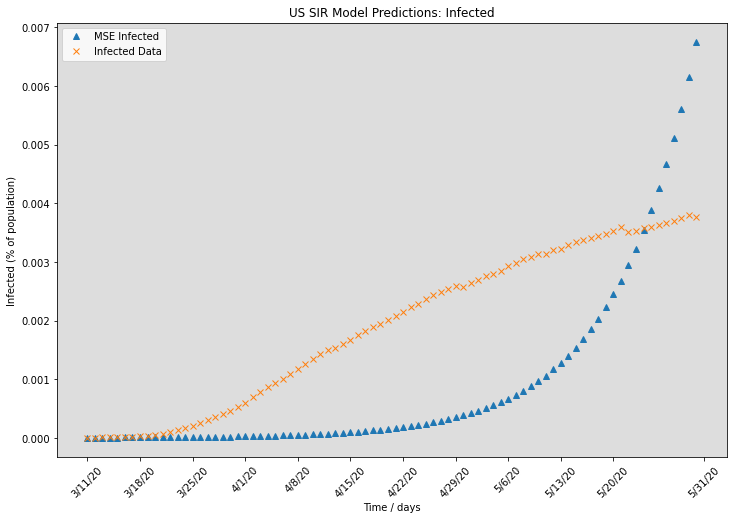

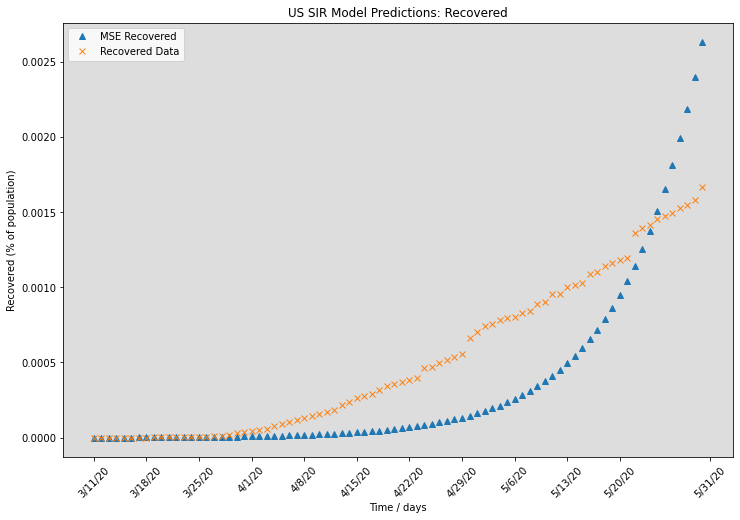

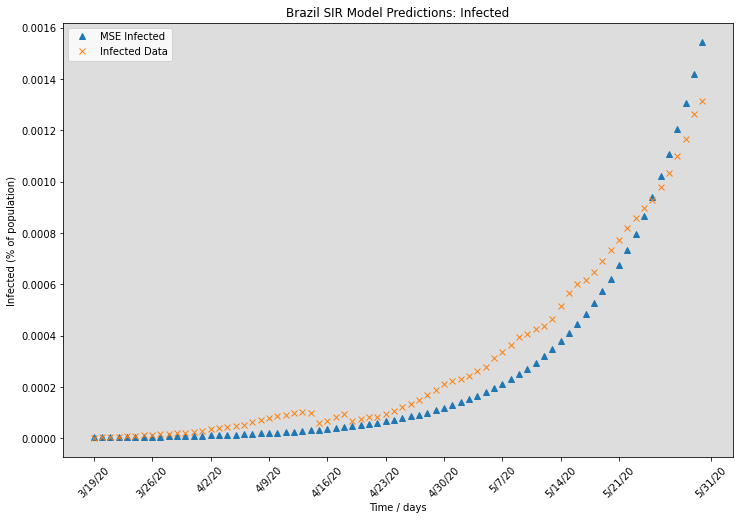

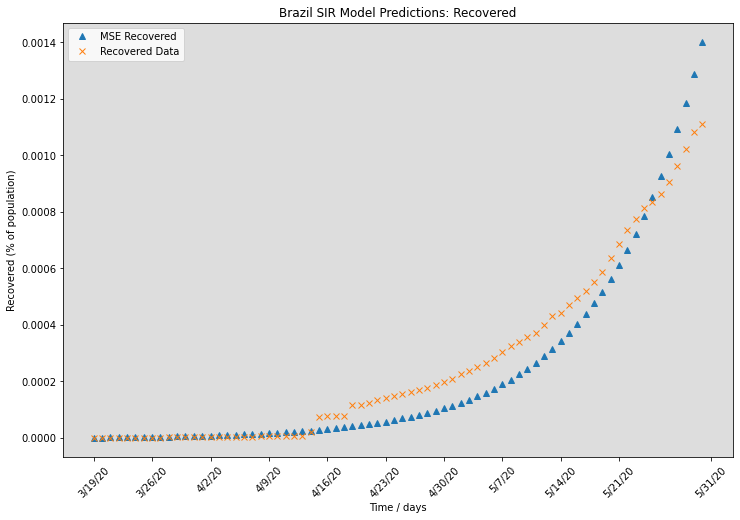

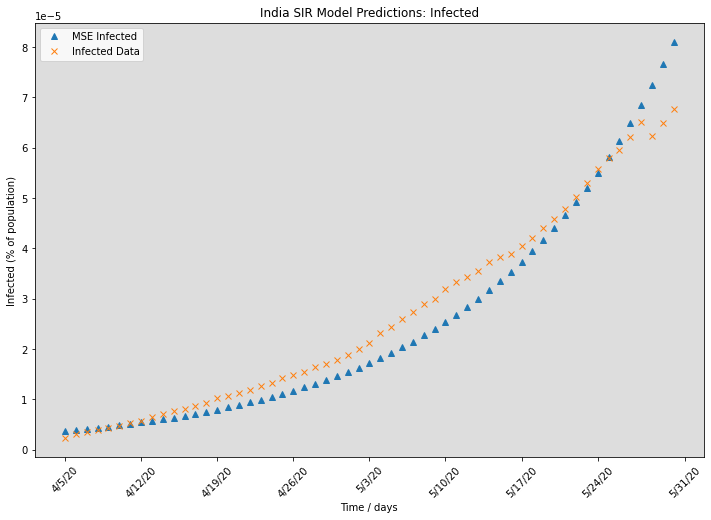

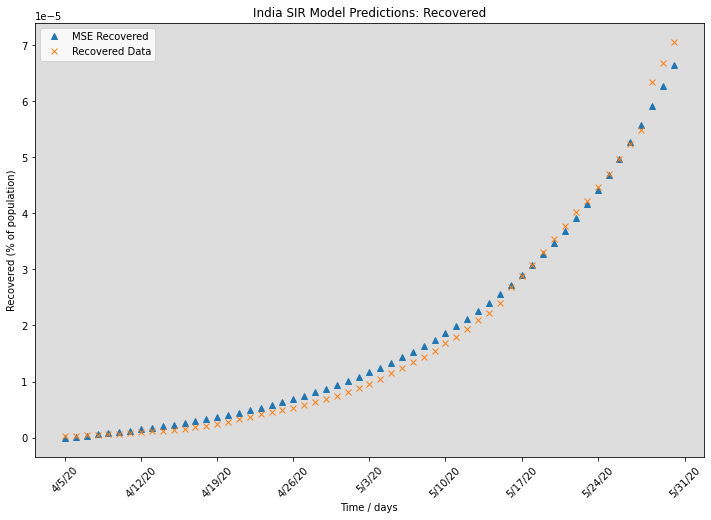

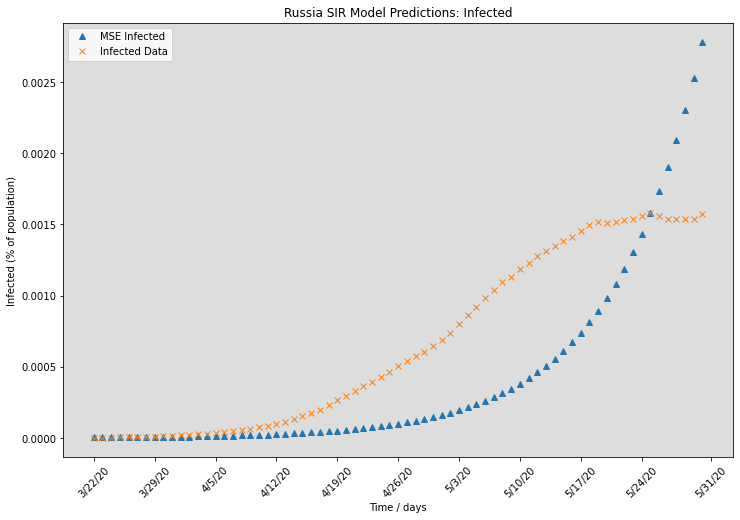

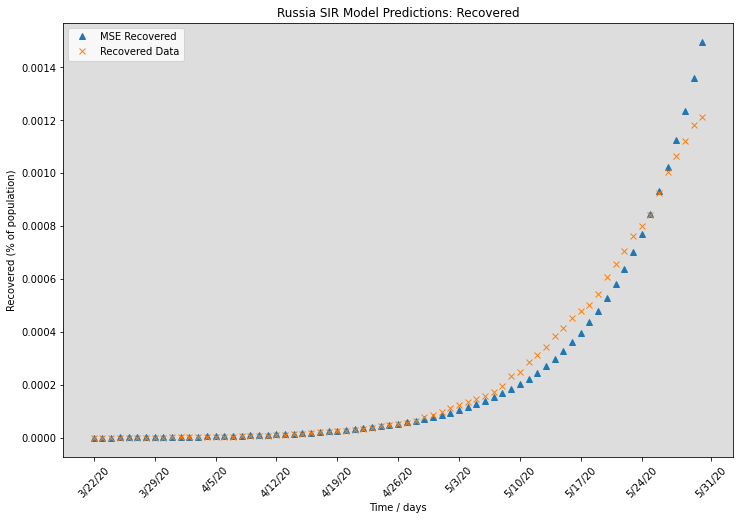

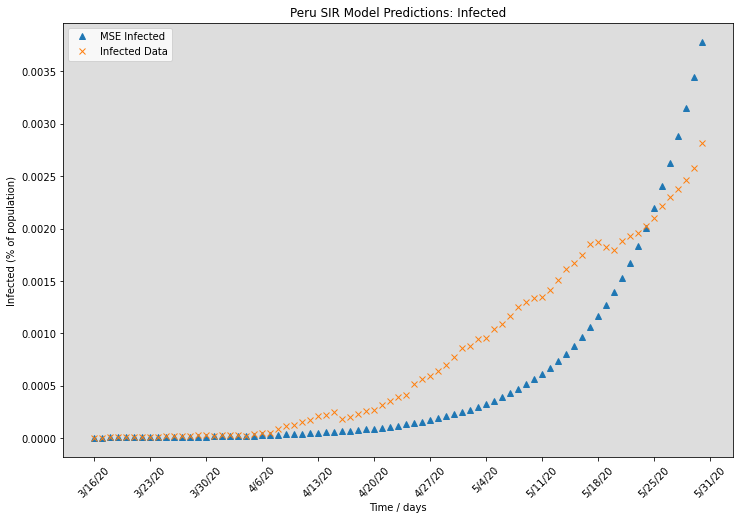

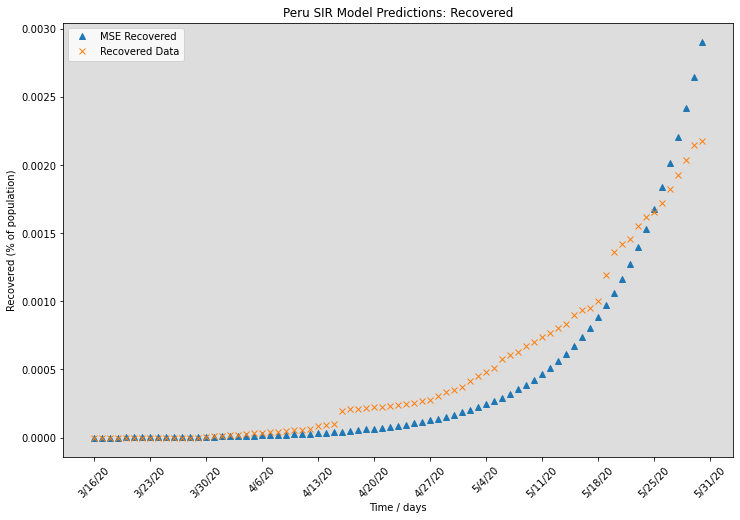

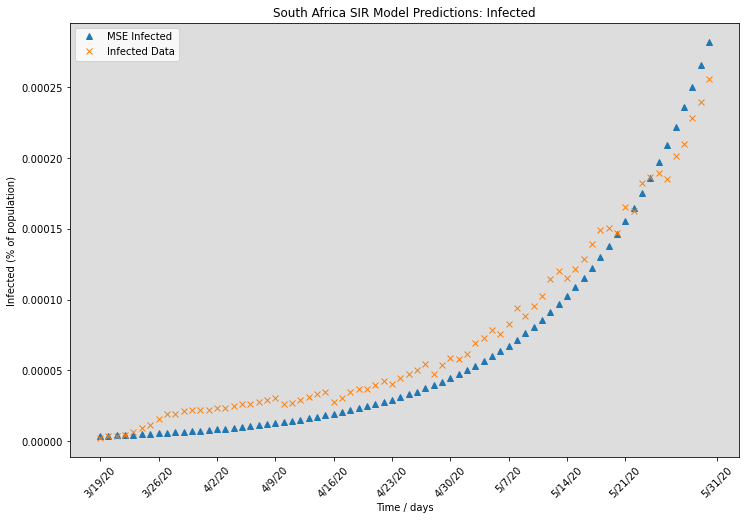

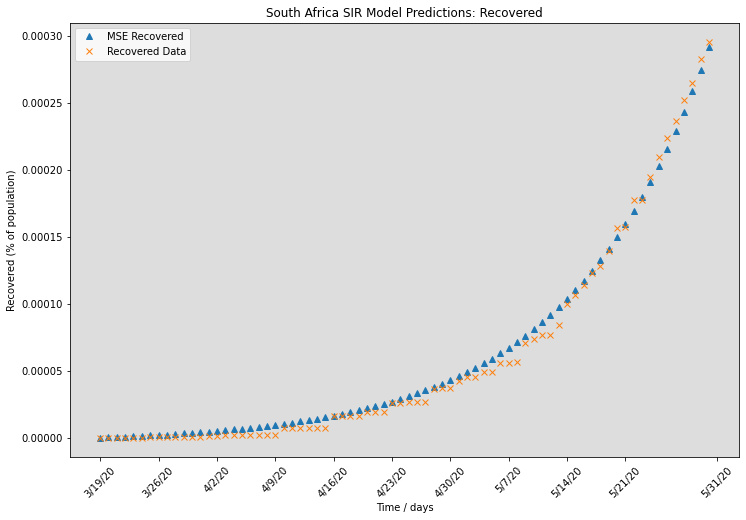

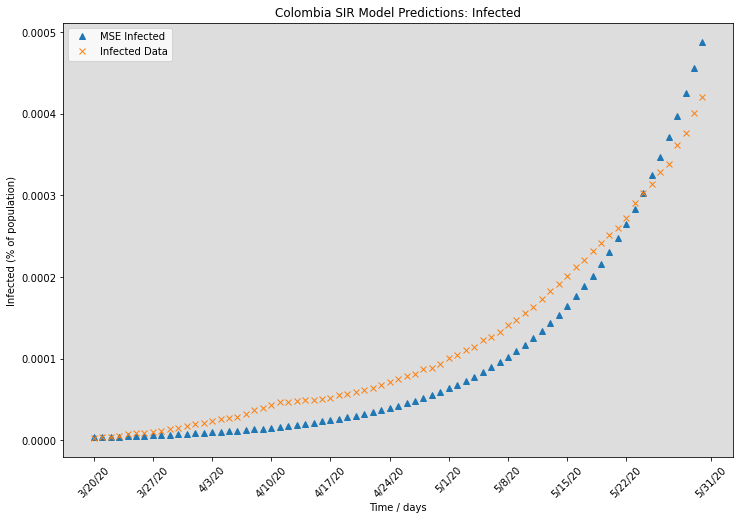

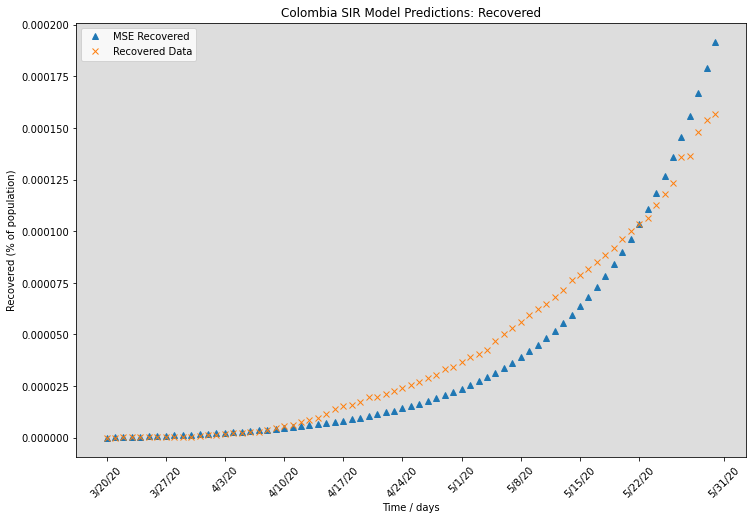

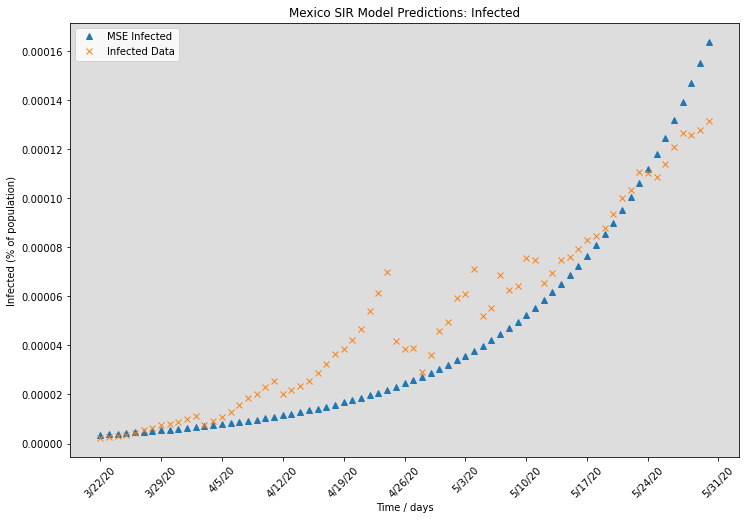

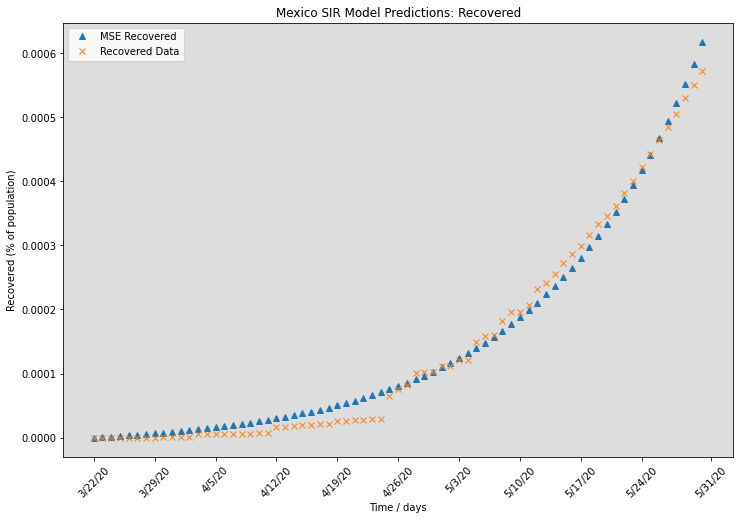

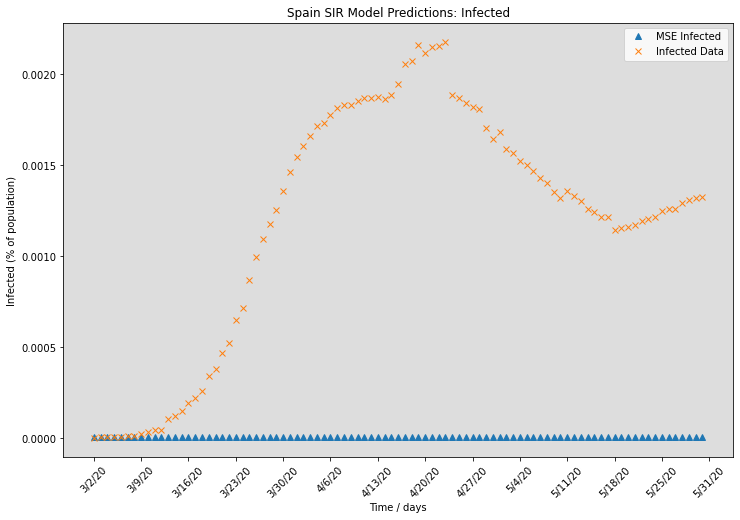

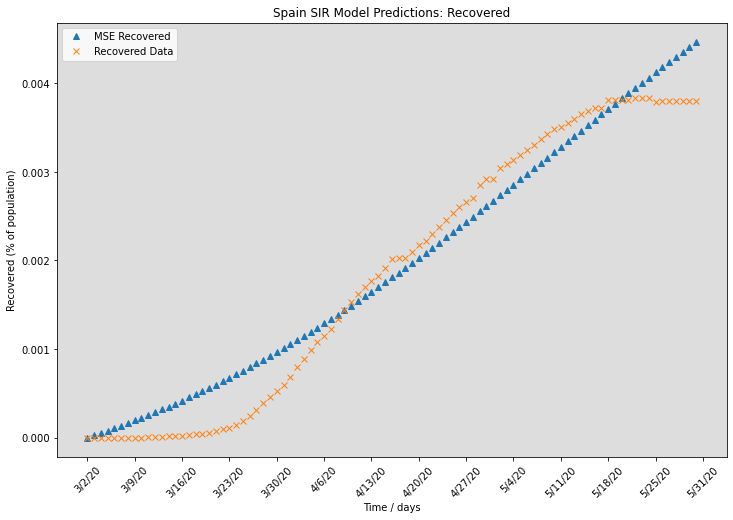

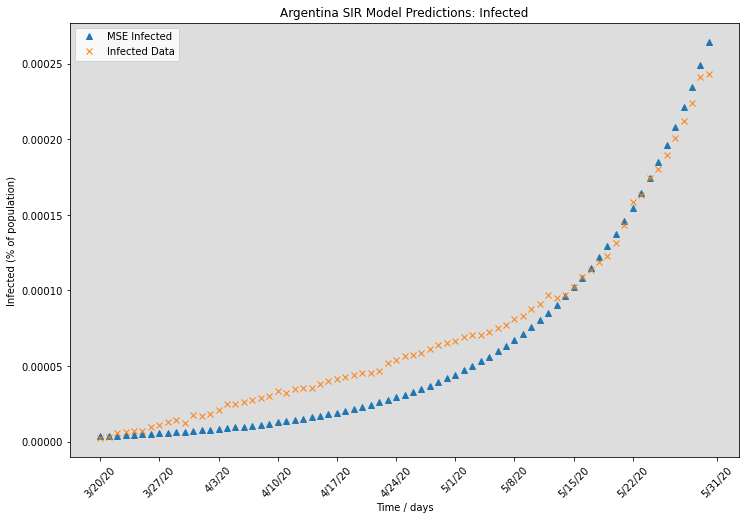

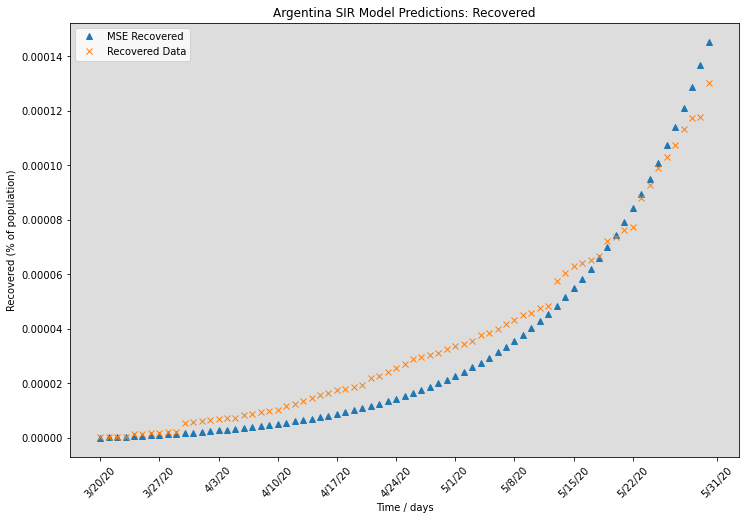

In [12]:
for country in countries:
    val = sir.sir_scipy(country, i_countries, r_countries, cutoff, [1.2, 1])
    sir.graph_scipy(country, i_countries, r_countries, val[0], val[1], cutoff)

Overall, the SIR model overpredicted the number of infected and recovered cases to varying degrees, with notable exceptions being India, Mexico, and Chile. The SIR model was way off when trying to fit Spain.

### Predict Month of June

Lets create two new DataFrames containing infected and recovered data spanning up to July 1st. This data will be used to evaluate how well the model fit the data.

In [13]:
# Stop at 7 / 1 / 20
predict_i_countries = raw_i_countries.iloc[:, :131 + 30]
predict_r_countries = raw_r_countries.iloc[:, :131 + 30]

Now, lets see how well the model predicted infected and recovered numbers in each country.

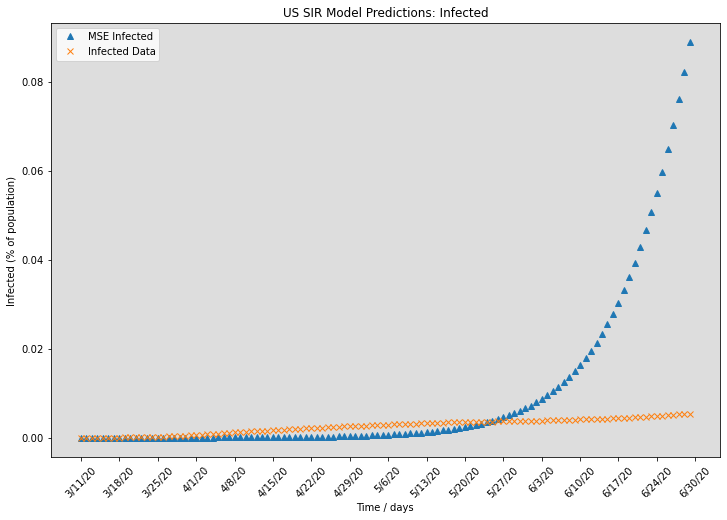

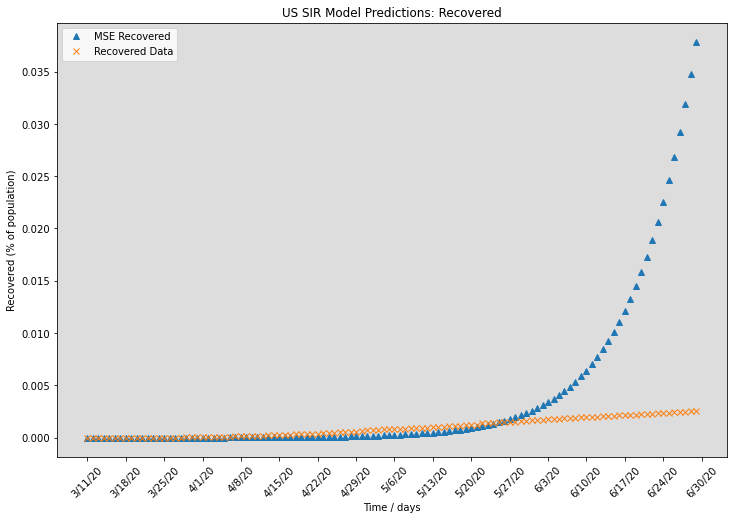

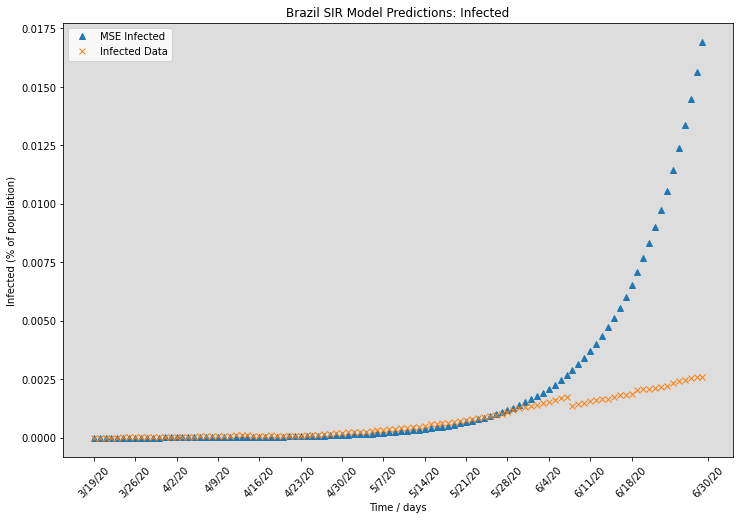

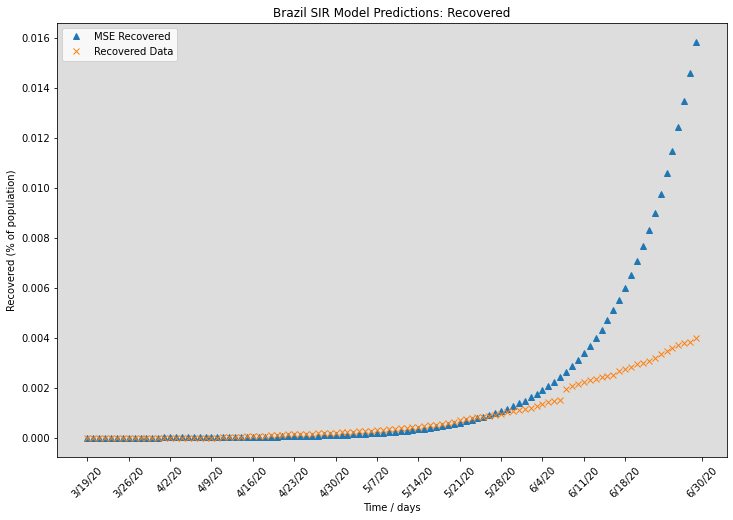

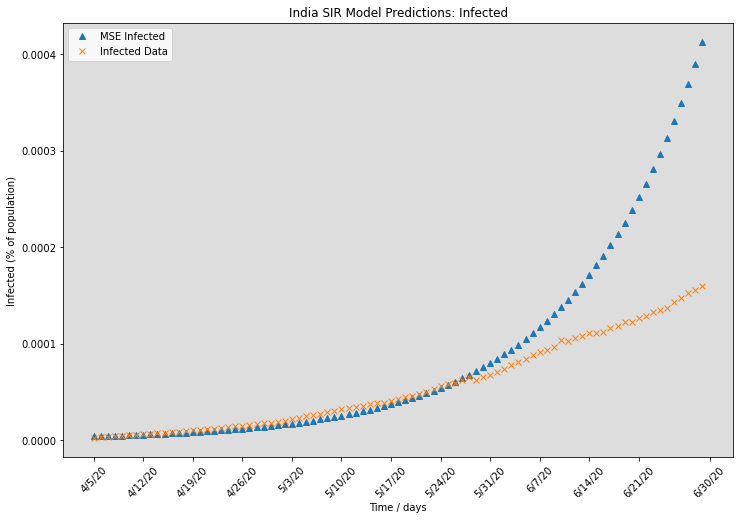

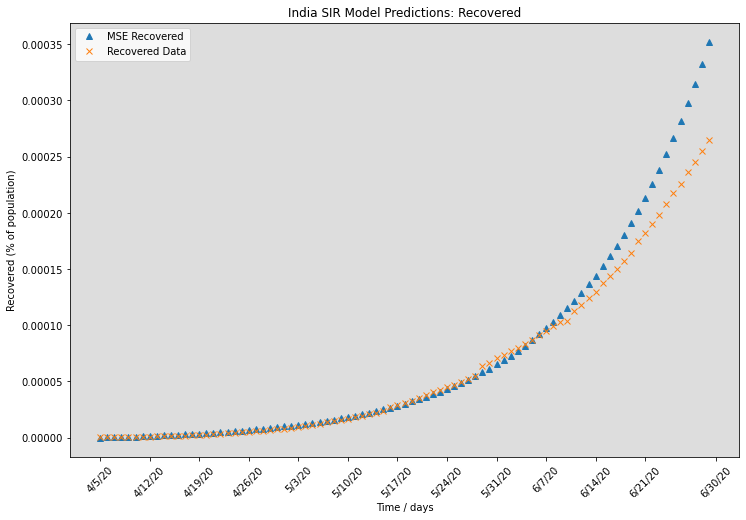

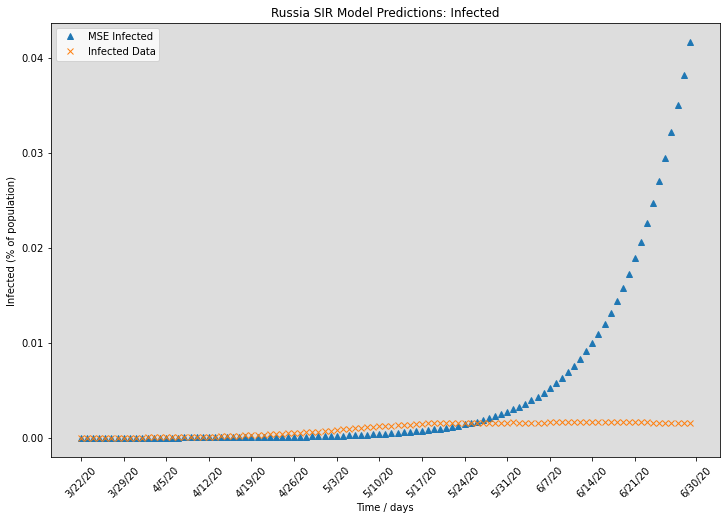

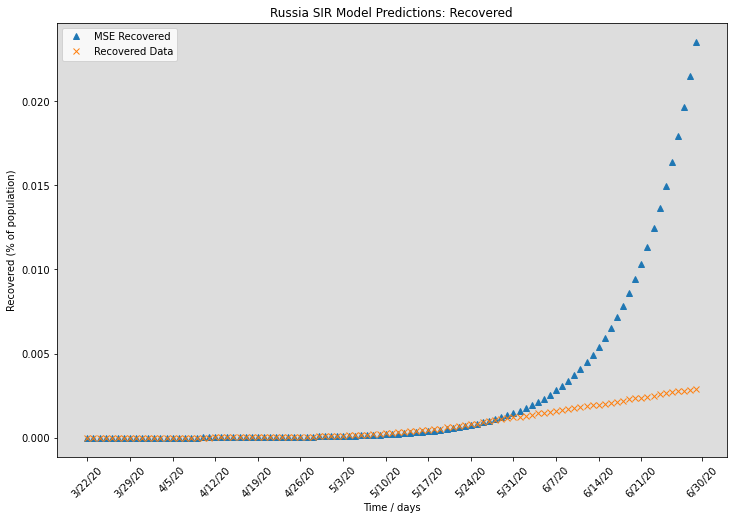

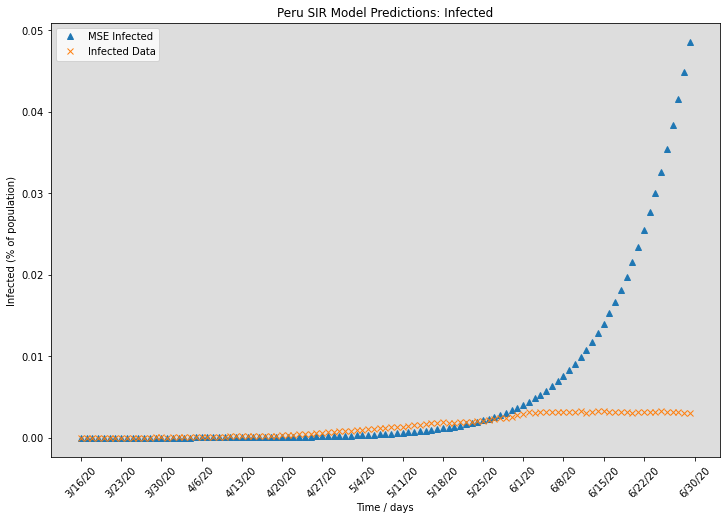

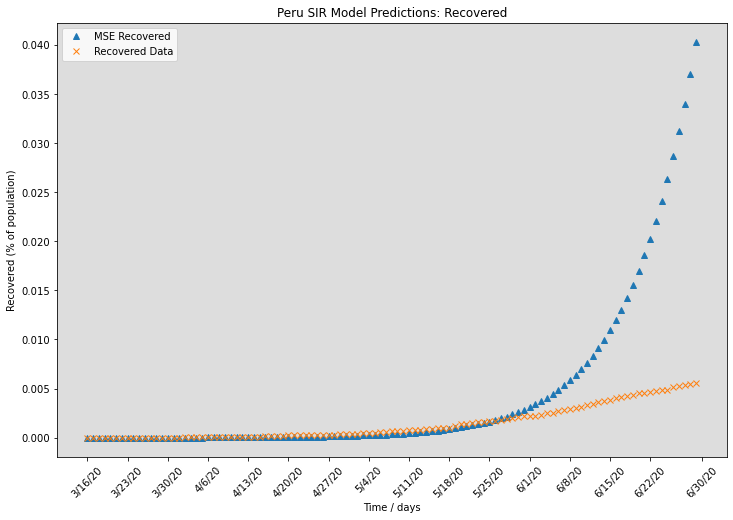

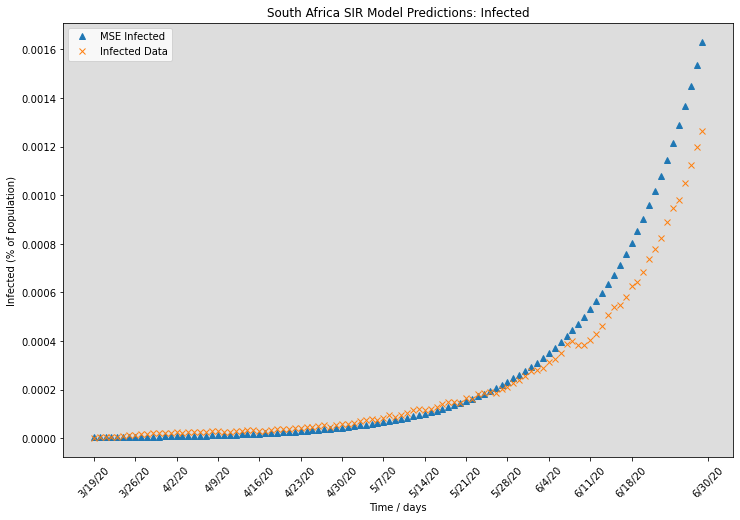

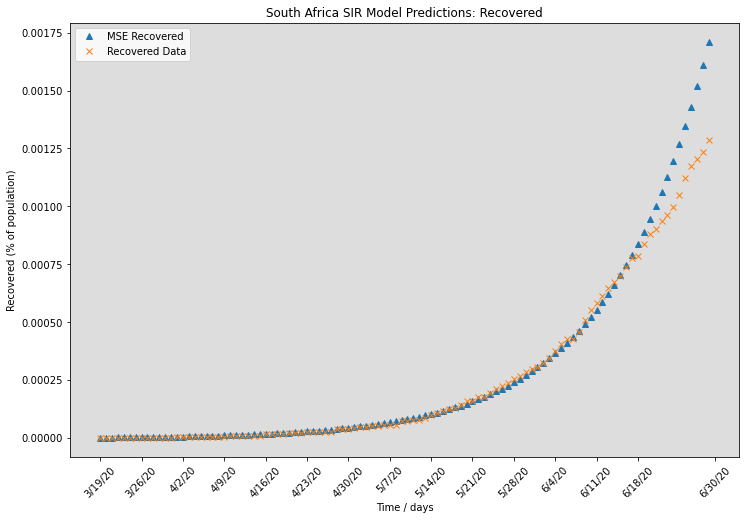

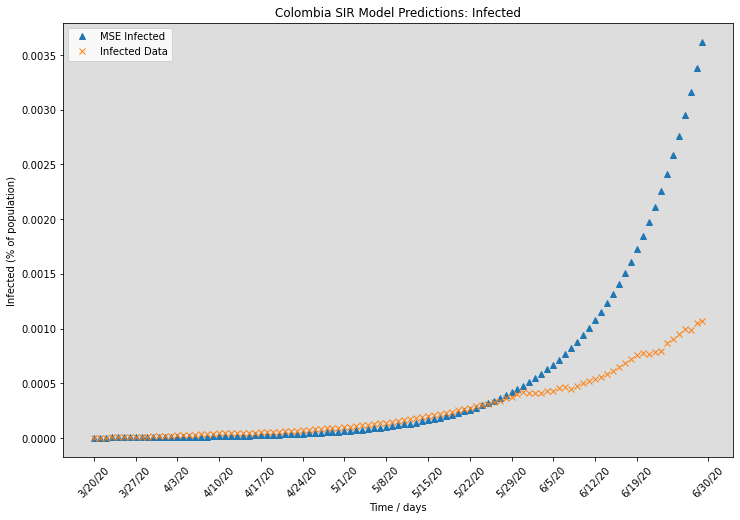

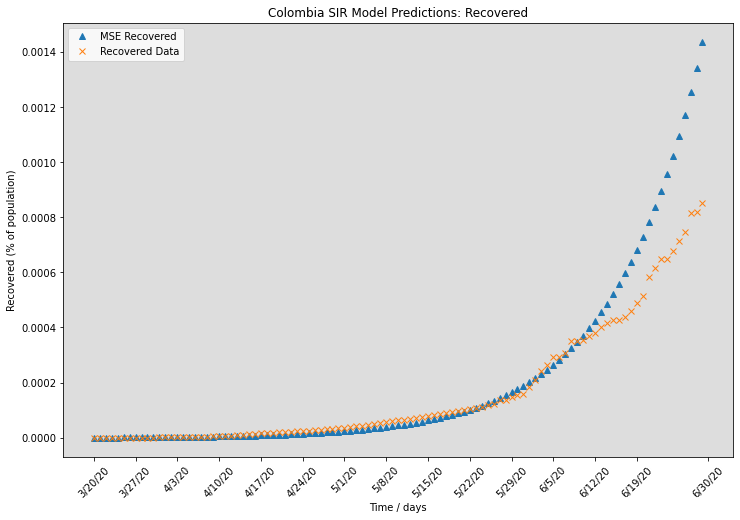

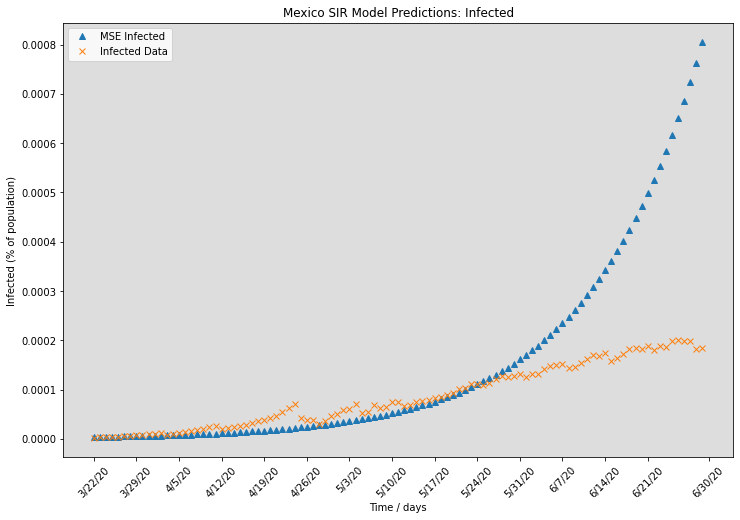

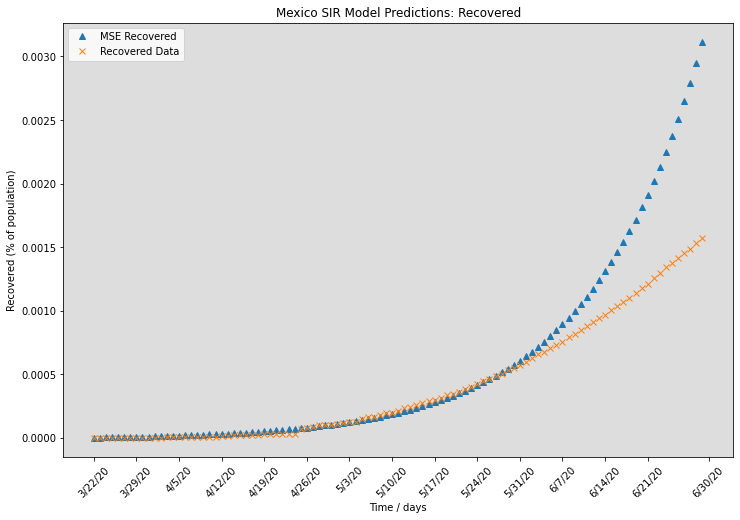

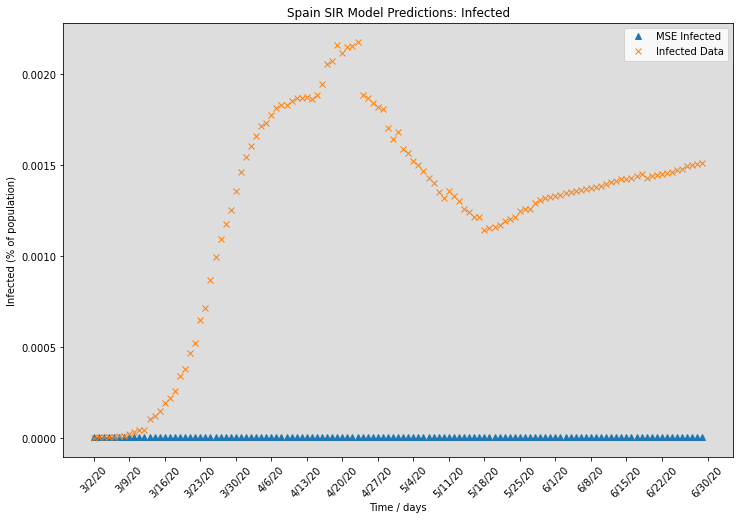

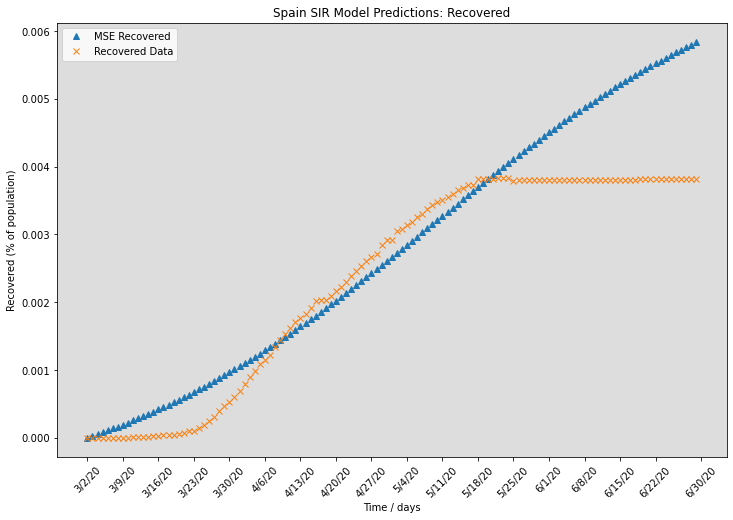

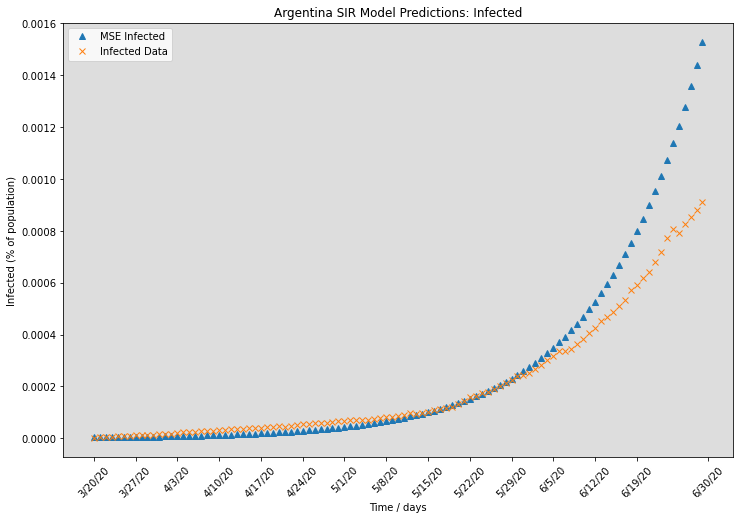

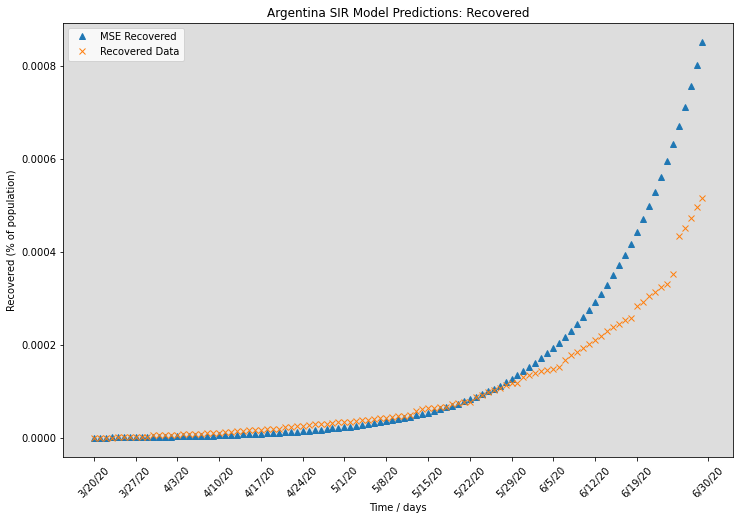

In [14]:
for country in countries:
    val = sir.sir_scipy(country, i_countries, r_countries, cutoff, [1.2, 1])
    sir.graph_scipy(country, predict_i_countries, predict_r_countries, val[0], val[1], cutoff)

### Conclusions

For all countries, the SIR model overpredicted the % of its population infected and recovered. Additionally, the overpredictions became more drastic during the month of June.